# AmExpert 2019 – Machine Learning Hackathon

### Public Leaderboard: 327th with a score 0.85467
### Private Leaderboard: 349th with a score 0.84463

## Problem Statement 

### The XYZ Credit Card company regularly helps its merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range.

### ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. 


###  The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

### The data available in this problem contains the below information, including the details of a sample of campaigns and coupons used in previous campaigns:

#### 1. User demographic details
#### 2. Campaign and coupon details
#### 3. Product details
#### 4. Previous transactions


###  Based on previous transaction & performance data from the last 18 campaigns, the participants have to predict the probability of a coupon being redeemed for the next 10 campaigns in the test set for each coupon and customer combination. A really fascinating challenge!

In [1]:
## Importing Numpy and Pandas
import numpy as np
import pandas as pd

### The following files have been provided:

#### 1. TRAIN

#### Contains the coupons offered to the given customers under the 18 campaigns

In [171]:
train = pd.read_csv("C:/Users/admin/Downloads/train.csv")
train.shape

(78369, 5)

In [3]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [4]:
# Checking for any missing values
train.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

### 2. Campaign Data

#### Campaign information for each of the 18 campaigns

In [45]:
campaign = pd.read_csv("C:/Users/admin/Downloads/campaign_data.csv", parse_dates=['start_date', 'end_date'])
campaign.shape

(28, 5)

In [6]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date,campaign_days
0,24,Y,2013-10-21,2013-12-20,60
1,25,Y,2013-10-21,2013-11-22,32
2,20,Y,2013-07-09,2013-11-16,70
3,23,Y,2013-08-10,2013-11-15,38
4,21,Y,2013-09-16,2013-10-18,32


### Note that the feature 'campaign_days' wasn't originally there in the dataset. I did feature engineering on excel only by taking the difference of features start_date and end_date

In [7]:
# Checking for any missing values
campaign.isnull().sum()

campaign_id      0
campaign_type    0
start_date       0
end_date         0
campaign_days    0
dtype: int64

### 3. Coupon Item Mapping

#### Mapping of coupon and items valid for discount under that coupon

In [8]:
coupon = pd.read_csv("C:/Users/admin/Downloads/coupon_item_mapping.csv")
coupon.shape

(92663, 2)

In [9]:
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [10]:
# Checking for any missing values
coupon.isnull().sum()

coupon_id    0
item_id      0
dtype: int64

### 4. Customer Demographics

#### Customer demographic information for some customers

In [185]:
cd = pd.read_csv("C:/Users/admin/Downloads/customer_demographics.csv")
cd.shape

(760, 7)

In [186]:
cd.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [187]:
# Checking for any missing values
cd.isnull().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [188]:
## checking for features' data types
cd.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

### There are missing values in couple of features of type 'object'. I am going to impute them using Simple Imputer and setting strategy = 'most_frequent' since both features comprises of string values  

In [468]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy= 'most_frequent')

In [469]:
# Imputing and assigning missing values
cd[['marital_status', 'no_of_children']] = impute.fit_transform(cd[['marital_status', 'no_of_children']])

In [191]:
cd.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,1,4
1,6,46-55,Married,0,2,1,5
2,7,26-35,Married,0,3,1,3
3,8,26-35,Married,0,4,2,6
4,10,46-55,Single,0,1,1,5


In [18]:
# The feature no_of_children can't be coerced to type int because it contains value 3+, which signifies 3 or more kids
cd['no_of_children'].unique()

array(['1', '2', '3+'], dtype=object)

In [192]:
# Checking for any missing values
cd.isnull().sum()

customer_id       0
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64

### 5. Customer Transaction Data

#### Transaction data for all customers for the duration of campaigns in the train data

In [193]:
ct = pd.read_csv("C:/Users/admin/Downloads/customer_transaction_data.csv")
ct.shape

(1324566, 7)

In [194]:
ct.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [195]:
# Checking for any missing values
ct.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

### 6. Item Data

#### Item information for each item sold by the retailer

In [63]:
item = pd.read_csv("C:/Users/admin/Downloads/item_data.csv")
item.shape

(74066, 4)

In [24]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [25]:
# Checking for any missing values
item.isnull().sum()

item_id       0
brand         0
brand_type    0
category      0
dtype: int64

### 7. Test

#### Contains the coupon customer combination for which redemption status was to be predicted

In [26]:
test = pd.read_csv("C:/Users/admin/Downloads/test_am.csv")
test.shape

(50226, 4)

In [27]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [28]:
# Checking for any missing values
test.isnull().sum()

id             0
campaign_id    0
coupon_id      0
customer_id    0
dtype: int64

### A. JOINING DATASETS

#### Below is the schema for the different data tables available:

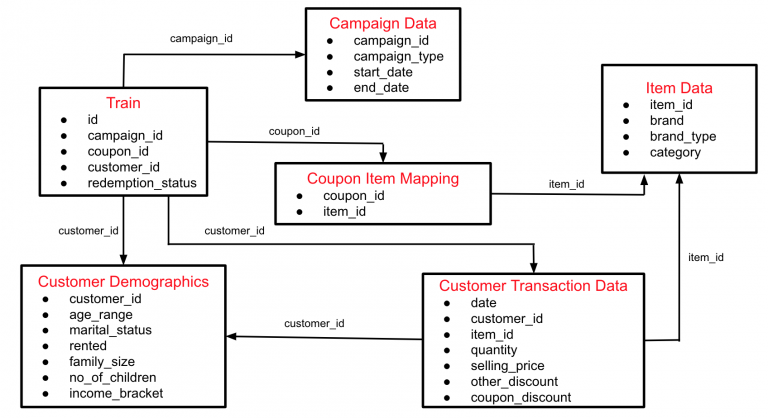

### First, i will perform a left-join between train & campaign datasets

In [29]:
tr_campaign = train.merge(campaign, how='left', on = 'campaign_id')

In [73]:
tr_campaign.shape

(78369, 9)

In [74]:
## Checking for unique values in the Customer_id feature of Customer Demographics table
cd['customer_id'].nunique()

760

In [75]:
## Checking for unique values in the Customer_id feature of Customer Transactions table
ct['customer_id'].nunique()

1582

### Combining the two customer datasets with an inner-join

In [76]:
cust = ct.merge(cd, how='inner', on = 'customer_id')

In [77]:
cust.shape

(791602, 13)

### Now, a left-join between tr_campaign & coupon_item_mapping datasets

In [78]:
tr_camp_cpn = tr_campaign.merge(coupon, how='left', on = 'coupon_id')

In [79]:
tr_camp_cpn.shape

(6420694, 10)

### Next, a left-join between tr_camp_cpn & item data datasets

In [80]:
tr_camp_cpn_item = tr_camp_cpn.merge(item, how='left', on = 'item_id')

In [81]:
tr_camp_cpn_item.shape

(6420694, 13)

### Lastly, a left-join involving tr_camp_cpn_item and cust datasets, using features 'customer_id' & 'item_id' 

In [82]:
train_final = tr_camp_cpn_item.merge(cust, how = 'left', on = ['customer_id', 'item_id'])

In [83]:
train_final.shape

(6467048, 24)

### Following the same procedure as above to combine Test with other datasets 

In [85]:
test_campaign = test.merge(campaign, how='left', on = 'campaign_id')

In [86]:
test_camp_cpn = test_campaign.merge(coupon, how='left', on = 'coupon_id')

In [87]:
test_camp_cpn_item = test_camp_cpn.merge(item, how='left', on = 'item_id')

In [88]:
test_final = test_camp_cpn_item.merge(cust, how = 'left', on = ['customer_id', 'item_id'])

In [89]:
test_final.shape

(5467158, 23)

In [84]:
# Checking for any missing values in train_final
train_final.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
redemption_status          0
campaign_type              0
start_date                 0
end_date                   0
campaign_days              0
item_id                    0
brand                      0
brand_type                 0
category                   0
date                 6372193
quantity             6372193
selling_price        6372193
other_discount       6372193
coupon_discount      6372193
age_range            6372193
marital_status       6372193
rented               6372193
family_size          6372193
no_of_children       6372193
income_bracket       6372193
dtype: int64

In [90]:
# Checking for any missing values in test_final
test_final.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
campaign_type            0
start_date               0
end_date                 0
campaign_days            0
item_id                  0
brand                    0
brand_type               0
category                 0
date               5376736
quantity           5376736
selling_price      5376736
other_discount     5376736
coupon_discount    5376736
age_range          5376736
marital_status     5376736
rented             5376736
family_size        5376736
no_of_children     5376736
income_bracket     5376736
dtype: int64

In [99]:
# Checking first 50 rows
train_final.head(50)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_days,item_id,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,24775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,14958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,40431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,20749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,56860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,58066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,56921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,56955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,58068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,56907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Checking last 30 rows
train_final.tail(30)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_days,item_id,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
6467018,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,41802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467019,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,28879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467020,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,13290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467021,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,16298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467022,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,40280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467023,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,35022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467024,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,24258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467025,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,2687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467026,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,20922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6467027,128595,13,681,623,0,X,2013-05-19,2013-05-07,47,45107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Checking value counts by id
train_final['id'].value_counts()

15649     11990
107739    11955
36112     11950
86251     11941
41476     11914
          ...  
29092         1
61876         1
59746         1
13698         1
8792          1
Name: id, Length: 78369, dtype: int64

In [98]:
# Checking first 50 rows
test_final.head(50)

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,campaign_days,item_id,brand,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,2013-09-16,2013-10-18,32,1033,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,22,869,967,X,2013-09-16,2013-10-18,32,1067,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,22,869,967,X,2013-09-16,2013-10-18,32,1084,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,22,869,967,X,2013-09-16,2013-10-18,32,1124,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,22,869,967,X,2013-09-16,2013-10-18,32,1125,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,22,869,967,X,2013-09-16,2013-10-18,32,1135,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,22,869,967,X,2013-09-16,2013-10-18,32,1153,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,22,869,967,X,2013-09-16,2013-10-18,32,1185,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,22,869,967,X,2013-09-16,2013-10-18,32,1186,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,22,869,967,X,2013-09-16,2013-10-18,32,1375,1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Checking value counts by id
test_final['id'].value_counts()

29656     12080
95304     12003
31983     11913
86142     11884
121218    11876
          ...  
48823         1
127761        1
45698         1
6302          1
79424         1
Name: id, Length: 50226, dtype: int64

### Clearly, there are many observations available in both train_final and test_final datasets corresponding to majority of the id's
### Therefore, in order to avoid potential memory constraints, i am going to sample one observation per id in both datasets using the command below:

In [127]:
# Sampling one observation per id from training dataset
train_final.groupby('id').apply(lambda df: df.sample(1, random_state = 42))

,,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_days,item_id,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
id,,,,,,,,,,,,,,,,,,,,,,
1,18,1,13,27,1053,0,X,2013-05-19,2013-05-07,47,37790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125,2,13,116,48,0,X,2013-05-19,2013-05-07,47,36721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,164,6,9,635,205,0,Y,2013-11-03,2013-12-04,32,27428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,196,7,13,644,1050,0,X,2013-05-19,2013-05-07,47,45243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,228,9,8,1017,1489,0,X,2013-02-16,2013-05-04,48,29675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128587,6466918,128587,8,71,1523,0,X,2013-02-16,2013-05-04,48,30155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128589,6466921,128589,30,547,937,0,X,2012-11-19,2013-04-01,46,53061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128590,6466958,128590,8,754,1004,0,X,2013-02-16,2013-05-04,48,24948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# Assigning the above dataframe to train_final
train_final = train_final.groupby('id').apply(lambda df: df.sample(1, random_state = 42))

In [174]:
# Re-setting the index and dropping the existing index
train_final.reset_index(drop=True, inplace=True)

In [175]:
train_final.shape

(78369, 24)

In [176]:
# Sampling one observation per id from test dataset
# Assigning the result to test 
test_final = test_final.groupby('id').apply(lambda df: df.sample(1, random_state = 42))

In [177]:
# Re-setting the index and dropping the existing index
test_final.reset_index(drop=True, inplace=True)

In [178]:
test_final.shape

(50226, 23)

In [179]:
test_final.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,campaign_days,item_id,brand,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,2013-09-16,2013-10-18,32,28051,1075,...,1.0,177.74,-42.74,0.0,36-45,Married,0.0,1,1,5.0
1,4,20,389,1566,Y,2013-07-09,2013-11-16,70,37848,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,22,981,510,X,2013-09-16,2013-10-18,32,1690,1335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,25,1069,361,Y,2013-10-21,2013-11-22,32,3832,1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,17,498,811,Y,2013-07-29,2013-08-30,32,4078,209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# Dropping date columns in both train & test datasets
print('Dropping date columns in both train & test datasets\n')
# del train_final['start_date'], train_final['end_date'], train_final['date'], test_final['start_date'], test_final['end_date'], test_final['date']

Dropping date columns in both train & test datasets



In [7]:
print('The final shape of training set is')
train_final.shape

The final shape of training set is


(78369, 21)

In [8]:
print('The final shape of test set is')
test_final.shape

The final shape of test set is


(50226, 20)

### B. EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### For the purpose of EDA, i am going to evaluate the training set that comprises the response variable

In [25]:
# Checking column data types
train_final.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status      int64
campaign_type         object
campaign_days          int64
item_id                int64
brand                  int64
brand_type            object
category              object
quantity             float64
selling_price        float64
other_discount       float64
coupon_discount      float64
age_range             object
marital_status        object
rented               float64
family_size           object
no_of_children        object
income_bracket       float64
dtype: object

In [27]:
# Checking info
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 21 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
campaign_days        78369 non-null int64
item_id              78369 non-null int64
brand                78369 non-null int64
brand_type           78369 non-null object
category             78369 non-null object
quantity             1127 non-null float64
selling_price        1127 non-null float64
other_discount       1127 non-null float64
coupon_discount      1127 non-null float64
age_range            1127 non-null object
marital_status       1127 non-null object
rented               1127 non-null float64
family_size          1127 non-null object
no_of_children       1127 non-null object
income_bracket       1127 non-null float64


### As many as 10 features have missing values, which will be taken care of once i start with preprocessing step

In [44]:
# Generating descriptive statistics for numeric features
train_final.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_days,item_id,brand,quantity,selling_price,other_discount,coupon_discount,rented,income_bracket
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302,44.771325,37613.849520,1083.186043,1.291038,127.700453,-24.998580,-2.960177,0.064774,5.056788
std,37126.440855,8.019215,329.966054,456.811339,0.095999,6.145676,21649.328486,1353.599087,1.716739,159.517792,44.160939,11.906642,0.246235,2.375191
min,1.000000,1.000000,1.000000,1.000000,0.000000,32.000000,22.000000,1.000000,1.000000,10.690000,-942.510000,-184.160000,0.000000,1.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000,46.000000,18958.000000,102.000000,1.000000,64.475000,-35.260000,0.000000,0.000000,4.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000,47.000000,39771.000000,686.000000,1.000000,89.050000,-13.540000,0.000000,0.000000,5.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000,48.000000,56655.000000,1274.000000,1.000000,142.120000,0.000000,0.000000,0.000000,6.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000,63.000000,73635.000000,5467.000000,54.000000,3846.960000,0.000000,0.000000,1.000000,12.000000


In [29]:
# Generating descriptive statistics for object features
train_final.describe(include='object')

,campaign_type,brand_type,category,age_range,marital_status,family_size,no_of_children
count,78369,78369,78369,1127,1127,1127,1127
unique,2,2,14,6,2,5,3
top,X,Established,Grocery,46-55,Married,2,1
freq,57684,61414,52965,375,966,444,869


In [39]:
# Checking correlations
train_final.corr()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_days,item_id,brand,quantity,selling_price,other_discount,coupon_discount,rented,income_bracket
id,1.000000,0.006443,-0.001067,-0.000088,-0.000328,0.000919,-0.004241,-0.000691,0.017239,0.014946,-0.018558,-0.013901,-0.041789,-0.013231
campaign_id,0.006443,1.000000,0.102046,-0.003556,-0.007548,0.210508,-0.026185,0.028849,-0.028548,-0.088035,0.059369,0.026118,-0.039902,0.017493
coupon_id,-0.001067,0.102046,1.000000,0.007551,0.023334,-0.068157,0.075693,0.261919,0.011851,0.088257,-0.022431,-0.077580,-0.067378,0.084253
customer_id,-0.000088,-0.003556,0.007551,1.000000,0.011690,-0.018606,0.002318,-0.001416,-0.019750,-0.044015,0.036605,0.034492,0.011709,0.037108
redemption_status,-0.000328,-0.007548,0.023334,0.011690,1.000000,0.012560,-0.017007,-0.016731,-0.007272,0.023322,-0.015874,-0.328928,-0.053224,0.011791
campaign_days,0.000919,0.210508,-0.068157,-0.018606,0.012560,1.000000,-0.020753,0.004123,-0.002626,-0.055647,-0.037499,0.026791,-0.067736,0.005581
item_id,-0.004241,-0.026185,0.075693,0.002318,-0.017007,-0.020753,1.000000,0.106185,-0.050744,0.076288,0.001093,-0.079607,0.023408,0.024563
brand,-0.000691,0.028849,0.261919,-0.001416,-0.016731,0.004123,0.106185,1.000000,-0.023544,0.061503,0.053180,0.051167,-0.082881,0.114329
quantity,0.017239,-0.028548,0.011851,-0.019750,-0.007272,-0.002626,-0.050744,-0.023544,1.000000,0.683207,-0.668692,0.009222,-0.013122,-0.032153
selling_price,0.014946,-0.088035,0.088257,-0.044015,0.023322,-0.055647,0.076288,0.061503,0.683207,1.000000,-0.565945,-0.062630,-0.032055,0.013832


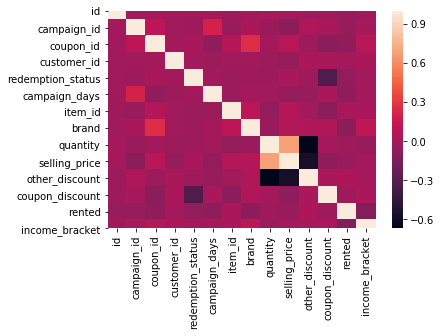

In [40]:
# Plotting heatmap
sns.heatmap(train_final.corr())

### quantity and selling_price have a considerably strong positive correlation. On the other hand, feature other_discount is negatively correlated to the two aforementioned variables, especially quantity. These 3 variables need to be taken care of once the predictive model-building phase starts

In [35]:
# Checking value counts of redempion_status
train_final['redemption_status'].value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [42]:
# Checking proportion of values 
train_final['redemption_status'].value_counts()/len(train_final)

0    0.990698
1    0.009302
Name: redemption_status, dtype: float64

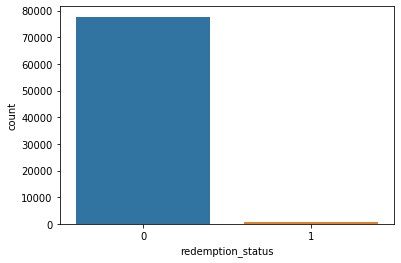

In [41]:
sns.countplot('redemption_status', data=train_final)

### This clearly is a case of class imbalance. To deal with this, undersampling will need to be done

In [32]:
# Defining a function for plot
def plots(i):
    if train_final[i].dtype == 'object':
        plt.figure(figsize=(8,8))
        plt.subplot(1,1,1)
        sns.countplot(x = i, hue='redemption_status', data=train_final)
        
    elif train_final[i].dtype != 'object':
        plt.figure(figsize=(10,10))
        plt.subplot(1,3,1)
        sns.boxplot(x = 'redemption_status', y = i, data=train_final)
        plt.subplot(1,3,2)
        plt.hist(train_final[i])
        plt.title(i)
        plt.subplot(1,3,3)
        sns.kdeplot(train_final[i])
        plt.tight_layout()

In [24]:
# Categorical columns
cat_columns = [i for i in train_final.columns if train_final[i].dtype == 'object']
print('Categorical columns\n')
cat_columns

Categorical columns



['campaign_type',
 'brand_type',
 'category',
 'age_range',
 'marital_status',
 'family_size',
 'no_of_children']

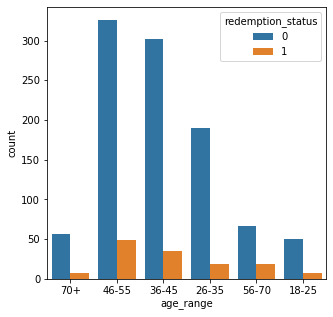

In [14]:
# Plot for age_range
plots('age_range')

In [51]:
pd.crosstab(train_final['age_range'], train_final['redemption_status'])

redemption_status,0,1
age_range,,
18-25,50,7
26-35,190,19
36-45,302,35
46-55,326,49
56-70,66,19
70+,57,7


### An overwhelming majority of customers didn't redeem the coupons offered, with most of them belonging to the age range 46-55 and closely followed by those in the age range 36-45. On the other hand, majrity coupon redemptions came from these two age groups as well

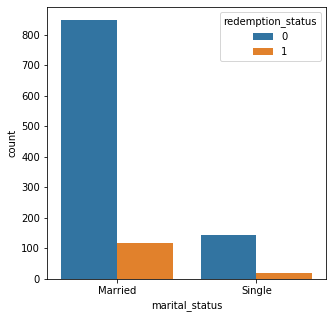

In [16]:
plots('marital_status')

### Most of those who did & didn't redeem the coupons were Married

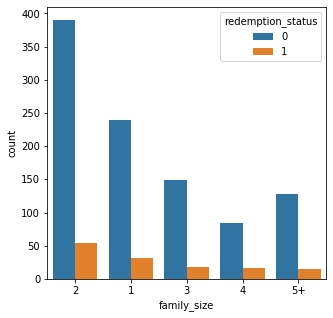

In [17]:
plots('family_size')

### Most of those who did as well as didn't redeem the coupons had a family size of 2

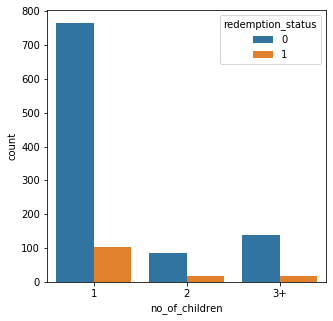

In [18]:
plots('no_of_children')

### Clearly, an overwhelming majority of customers had only 1 child

In [42]:
pd.crosstab(train_final['category'],train_final['redemption_status'])

redemption_status,0,1
category,,
Bakery,573,0
"Dairy, Juices & Snacks",1139,3
Flowers & Plants,212,2
Garden,4,0
Grocery,52354,611
Meat,303,6
Natural Products,755,14
Packaged Meat,2365,22
Pharmaceutical,17329,56


### Looks like most of the discount coupons were offered for Grocery category products, followed by Pharmaceutical category products. Another noticeable thing is that for categories such as Garden. Salads, Bakery and Vegetables (cut), no coupon was redeemed

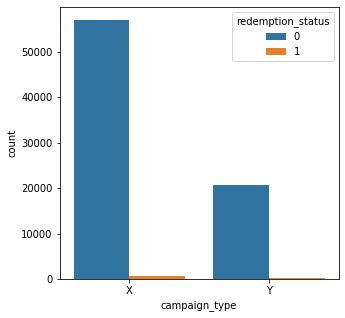

In [19]:
plots('campaign_type')

In [48]:
pd.crosstab(train_final['category'],train_final['campaign_type'])

campaign_type,X,Y
category,,
Bakery,450,123
"Dairy, Juices & Snacks",384,758
Flowers & Plants,214,0
Garden,4,0
Grocery,40922,12043
Meat,309,0
Natural Products,769,0
Packaged Meat,1999,388
Pharmaceutical,10012,7373


In [51]:
pd.crosstab(train_final['campaign_type'], train_final['redemption_status'])

redemption_status,0,1
campaign_type,,
X,57048,636
Y,20592,93


### An overwhelming majority of discount coupons were offered under campaign of type X

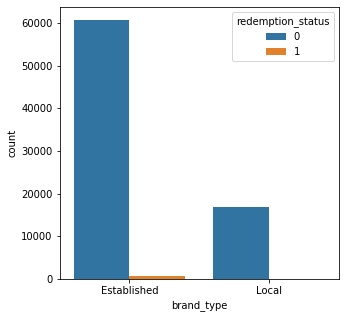

In [20]:
plots('brand_type')

### An overwhelming majority of discount coupons offered were for the products of an established brand

In [35]:
# Numerical columns
num_columns = [i for i in train_final.columns if train_final[i].dtype != 'object']
print('Numerical columns\n')
num_columns

Numerical columns



['id',
 'campaign_id',
 'coupon_id',
 'customer_id',
 'redemption_status',
 'campaign_days',
 'item_id',
 'brand',
 'quantity',
 'selling_price',
 'other_discount',
 'coupon_discount',
 'rented',
 'income_bracket']

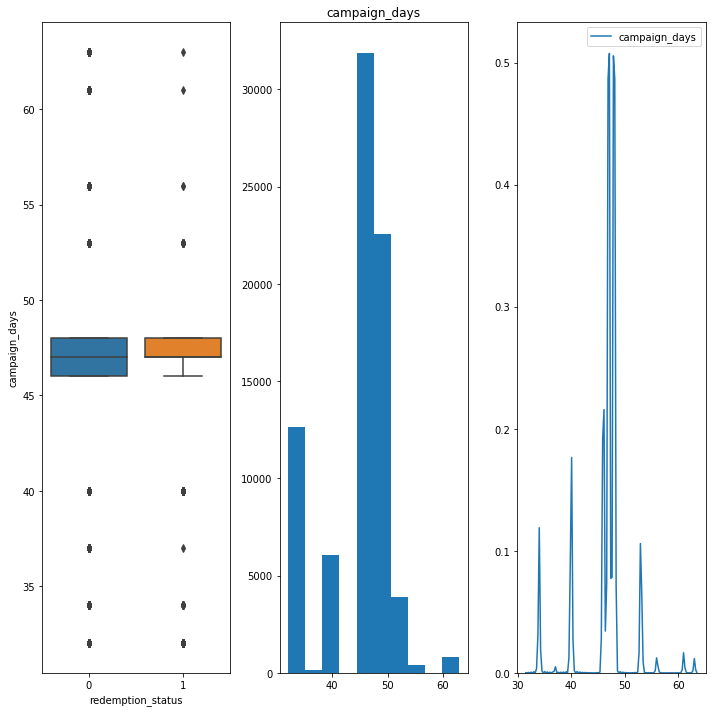

In [33]:
plots('campaign_days')

In [64]:
train_final.groupby('campaign_days').size()

campaign_days
32     9246
34     3411
37      143
40     6056
46     9249
47    22606
48    22555
53     3895
56      408
61      476
63      324
dtype: int64

### The median no. of days spent for both coupons redeemed and that were not is the exact same. Most campaigns lasted for somewhere in the range 45-55 days

c:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


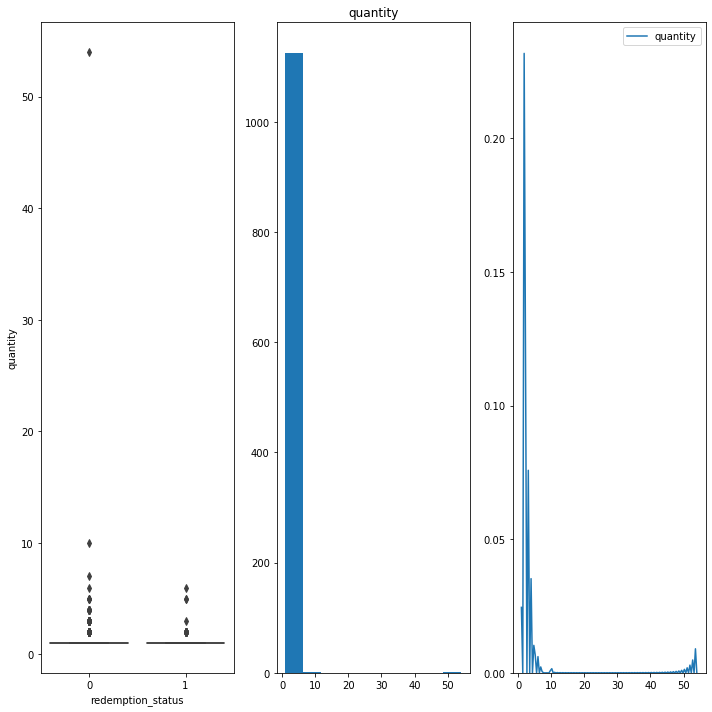

In [39]:
plots('quantity')

In [45]:
train_final['quantity'].value_counts()

1.0     938
2.0     140
3.0      28
4.0      10
5.0       6
6.0       2
7.0       1
54.0      1
10.0      1
Name: quantity, dtype: int64

In [50]:
train_final.groupby('redemption_status').quantity.sum()

redemption_status
0    1284.0
1     171.0
Name: quantity, dtype: float64

Text(0, 0.5, 'count')

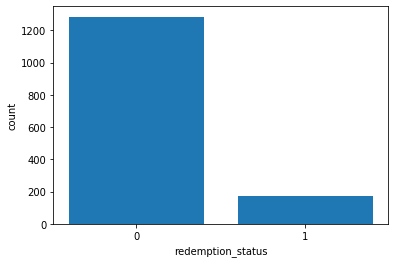

In [52]:
# Bar plot showing the above calculation
plt.bar(x=['0', '1'], height=train_final.groupby('redemption_status').quantity.sum().to_list())
plt.xlabel('redemption_status')
plt.ylabel('count')

### The median quantity sold corresponding to the status of coupon redemption is same - though the sum of quantity sold for the same is miles apart as expected. The most frequent quantity sold was 1.

c:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


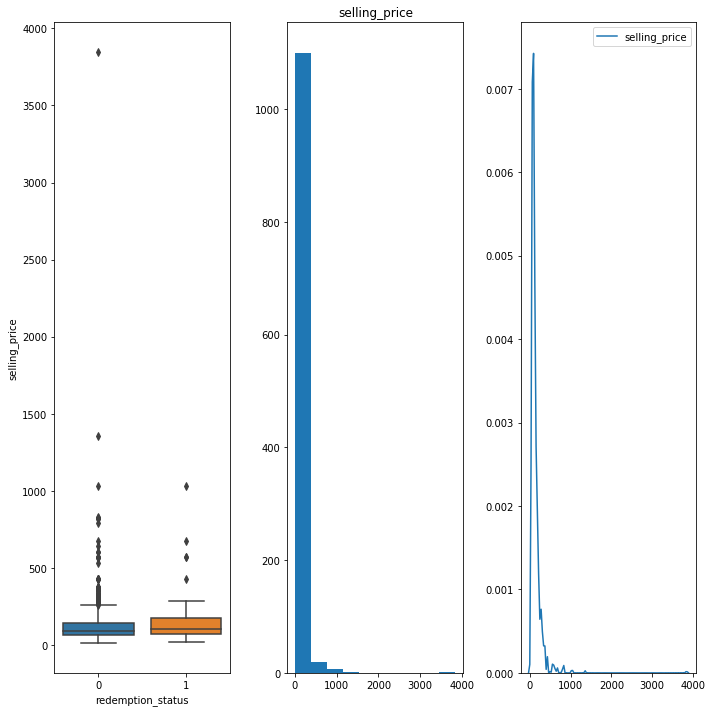

In [55]:
plots('selling_price')

### Surprisingly, the median selling price for items for which discount coupon was redeemed is higher. Also, a majority chunk of items had a selling_price between 0 and 500

c:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


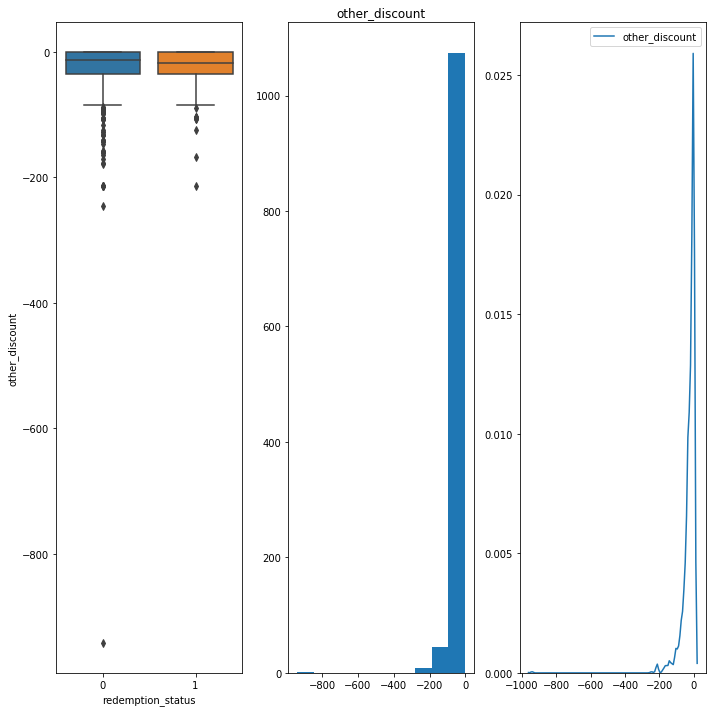

In [60]:
plots('other_discount')

### Unsurprisingly, items for which coupon was redeemed have a higher median value for other discount. And the other discounts received on most items is in the range 0 to 100

c:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


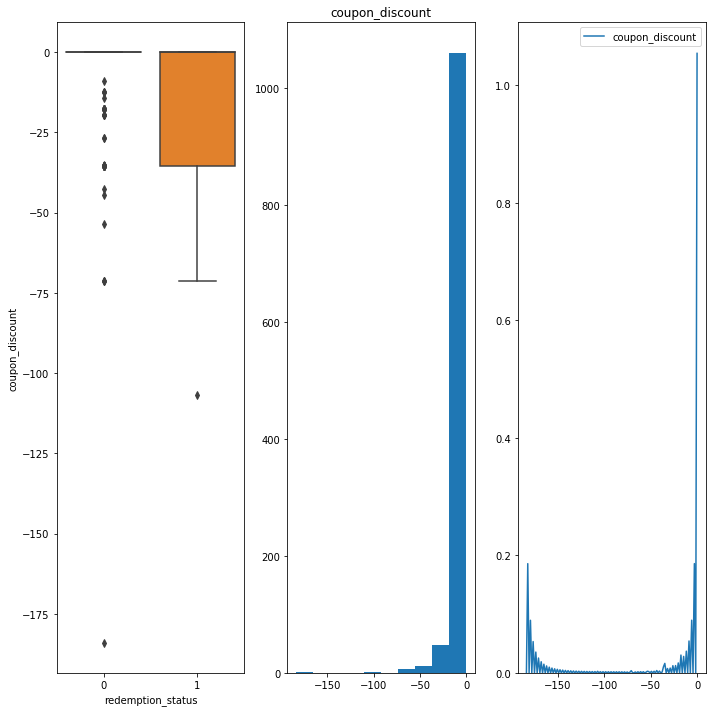

In [73]:
plots('coupon_discount')

In [75]:
train_final.groupby('redemption_status').coupon_discount.mean()

redemption_status
0    -1.50997
1   -13.52750
Name: coupon_discount, dtype: float64

### The coupon discount received on most items seems to be in the range 0-25 

c:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


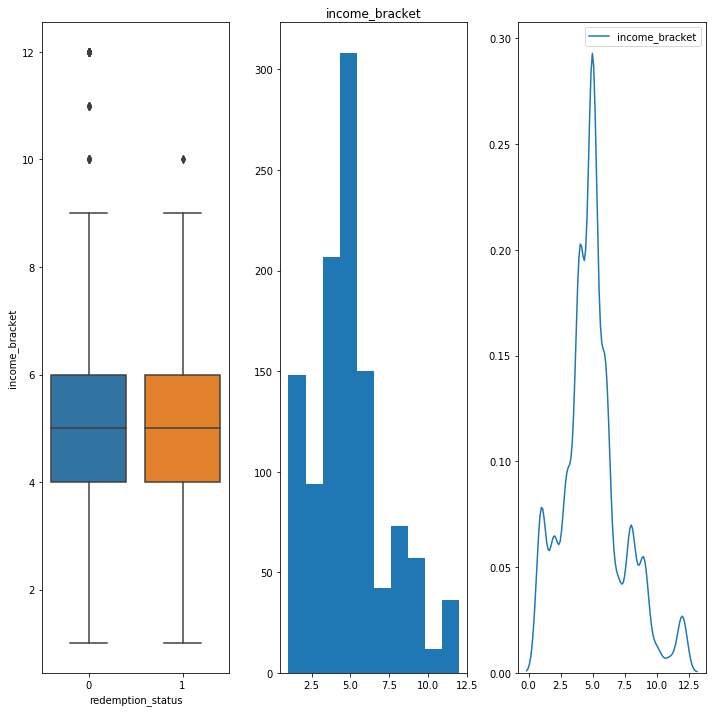

In [80]:
plots('income_bracket')

In [84]:
train_final.groupby('income_bracket').size()

income_bracket
1.0      83
2.0      65
3.0      94
4.0     207
5.0     308
6.0     150
7.0      42
8.0      73
9.0      57
10.0     12
11.0      7
12.0     29
dtype: int64

### The median income bracket corresponding to redemption_status is the same. In fact, it appears identical. Most customers fall in the 4-6 income bracket which represents the middle-class bracket.

### C. PREPROCESSING


In [528]:
# Checking for null values
print('Missing values in train\n')
train_final.isnull().sum()

Missing values in train



id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
campaign_type            0
campaign_days            0
item_id                  0
brand                    0
brand_type               0
category                 0
quantity             77242
selling_price        77242
other_discount       77242
coupon_discount      77242
age_range            77242
marital_status       77242
rented               77242
family_size          77242
no_of_children       77242
income_bracket       77242
dtype: int64

In [421]:
# Checking for null values
print('Missing values in test\n')
test_final.isnull().sum()

Missing values in test



id                     0
campaign_id            0
coupon_id              0
customer_id            0
campaign_type          0
campaign_days          0
item_id                0
brand                  0
brand_type             0
category               0
quantity           49272
selling_price      49272
other_discount     49272
coupon_discount    49272
age_range          49272
marital_status     49272
rented             49272
family_size        49272
no_of_children     49272
income_bracket     49272
dtype: int64

In [422]:
# Checking out columns with missing values
miss = [i for i in train_final.columns if train_final[i].isnull().any()]

In [423]:
miss

['quantity',
 'selling_price',
 'other_discount',
 'coupon_discount',
 'age_range',
 'marital_status',
 'rented',
 'family_size',
 'no_of_children',
 'income_bracket']

In [424]:
print('The following features have missing values in both train and test datasets:\n')
for i in miss:
    print(i)

The following features have missing values in both train and test datasets:

quantity
selling_price
other_discount
coupon_discount
age_range
marital_status
rented
family_size
no_of_children
income_bracket


### Note that the following features :
* #### age_range
* #### marital_status
* #### rented
* #### family_size
* #### no_of_children
* #### income_bracket

### came from the Customer Demographics (cd) dataset

### Similarly, the following features :
* #### quantity
* #### selling_price
* #### other_discount
* #### coupon_discount

### came from the Customer Transaction (ct) dataset

### Since the 'customer_id' is another common feature among the train_final, test_final, Customer Demographics (cd) and Customer Transaction (ct) datasets, i will use this feature to find out the customer id's that are identical to train_final, test_final & cd/ct datasets to impute the missing values in the above mentioned 10 features

In [425]:
def imputations(x,y,z):
    a = list(x)
    b = list(y)
    c = list(zip(a,b))
    d = dict(c)

    # Maps customer_id in series to the customer_id stored as keys in dictionary d
    # Returns the values corresponding to keys and is stored as list
    return z['customer_id'].map(d).to_list()

In [427]:
train_final[train_final['age_range'].notnull()]

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_days,item_id,brand,brand_type,category,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
122,197,9,788,155,Y,32,22400,946,Established,Grocery,4.0,178.10,-76.94,0.00,70+,Married,0.0,2,1,5.0
126,205,29,416,874,Y,53,53518,89,Established,Grocery,1.0,89.05,-74.45,0.00,46-55,Married,0.0,2,1,5.0
185,306,11,1044,1332,Y,46,63867,1762,Established,Pharmaceutical,1.0,149.25,0.00,0.00,36-45,Married,0.0,2,1,8.0
223,366,13,734,800,X,47,28784,783,Established,Pharmaceutical,1.0,320.22,0.00,0.00,46-55,Married,0.0,2,1,3.0
464,777,8,989,514,X,48,55016,1367,Established,Grocery,1.0,159.93,0.00,0.00,26-35,Married,0.0,2,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78128,128202,3,671,1025,Y,56,16520,676,Established,Grocery,1.0,65.90,0.00,0.00,46-55,Married,0.0,2,1,5.0
78140,128219,8,46,1392,X,48,6595,56,Local,Grocery,1.0,106.50,-7.12,0.00,36-45,Married,0.0,3,2,5.0
78208,128327,8,727,716,X,48,28025,782,Established,Grocery,1.0,49.51,0.00,0.00,36-45,Single,1.0,4,2,1.0
78243,128386,9,575,45,Y,32,71671,406,Established,Grocery,1.0,131.44,-21.37,-17.81,46-55,Married,0.0,5+,3+,1.0


### Imputing age_range

In [428]:
train_age_range = imputations(cd['customer_id'], cd['age_range'], train_final)

In [429]:
test_age_range = imputations(cd['customer_id'], cd['age_range'], test_final)

### Imputing marital_status 

In [430]:
train_marital_status = imputations(cd['customer_id'], cd['marital_status'], train_final)

In [431]:
test_marital_status = imputations(cd['customer_id'], cd['marital_status'], test_final)

### Imputing rented

In [432]:
train_rented = imputations(cd['customer_id'], cd['rented'], train_final)

In [433]:
test_rented = imputations(cd['customer_id'], cd['rented'], test_final)

### Imputing family_size

In [434]:
train_family_size = imputations(cd['customer_id'], cd['family_size'], train_final)

In [435]:
test_family_size = imputations(cd['customer_id'], cd['family_size'], test_final)

### Imputing no_of_children

In [436]:
train_no_of_children = imputations(cd['customer_id'], cd['no_of_children'], train_final)

In [437]:
test_no_of_children = imputations(cd['customer_id'], cd['no_of_children'], test_final)

### Imputing income_bracket

In [438]:
train_income_bracket = imputations(cd['customer_id'], cd['income_bracket'], train_final)

In [439]:
test_income_bracket = imputations(cd['customer_id'], cd['income_bracket'], test_final)

### Imputing quantity

In [440]:
train_quantity = imputations(ct['customer_id'], ct['quantity'], train_final)

In [441]:
test_quantity = imputations(ct['customer_id'], ct['quantity'], test_final)

### Imputing selling_price

In [442]:
train_sp = imputations(ct['customer_id'], ct['selling_price'], train_final)

In [443]:
test_sp = imputations(ct['customer_id'], ct['selling_price'], test_final)

### Imputing other_discount

In [444]:
train_od = imputations(ct['customer_id'], ct['other_discount'], train_final)

In [445]:
test_od = imputations(ct['customer_id'], ct['other_discount'], test_final)

### Imputing coupon_discount

In [446]:
train_cd = imputations(ct['customer_id'], ct['coupon_discount'], train_final)

In [447]:
test_cd = imputations(ct['customer_id'], ct['coupon_discount'], test_final)

### Dropping features with missing values & replacing them with imputed columns

In [529]:
# Dropping features with missing values
train_final.drop(miss, axis=1, inplace=True)

In [449]:
# Dropping features with missing values
test_final.drop(miss, axis=1, inplace=True)

In [536]:
# Assigning the imputed features
train_final['quantity'] = train_quantity
train_final['selling_price'] = train_sp
train_final['other_discount'] = train_od
train_final ['coupon_discount']= train_cd
train_final['age_range'] = train_age_range
train_final['marital_status'] = train_marital_status
train_final['rented'] = train_rented
train_final['family_size'] = train_family_size
train_final['no_of_children'] = train_no_of_children
train_final['income_bracket'] = train_income_bracket

In [454]:
# Assigning the imputed features
test_final['quantity'] = test_quantity
test_final['selling_price'] = test_sp
test_final['other_discount'] = test_od
test_final ['coupon_discount']= test_cd
test_final['age_range'] = test_age_range
test_final['marital_status'] = test_marital_status
test_final['rented'] = test_rented
test_final['family_size'] = test_family_size
test_final['no_of_children'] = test_no_of_children
test_final['income_bracket'] = test_income_bracket

In [531]:
train_final.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
campaign_type            0
campaign_days            0
item_id                  0
brand                    0
brand_type               0
category                 0
quantity                 0
selling_price            0
other_discount           0
coupon_discount          0
age_range            34708
marital_status       34708
rented               34708
family_size          34708
no_of_children       34708
income_bracket       34708
dtype: int64

In [455]:
test_final.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
campaign_type          0
campaign_days          0
item_id                0
brand                  0
brand_type             0
category               0
quantity               0
selling_price          0
other_discount         0
coupon_discount        0
age_range          19287
marital_status     19287
rented             19287
family_size        19287
no_of_children     19287
income_bracket     19287
dtype: int64

### Still, there are many missing values in both datasets. Now once again, i will use Simple Imputer to impute the remaining missing values. Keeping the imputing strategy as 'most_frequent' to impute missing values in categorical features

In [537]:
# Finding object type columns with missing values
cat = [i for i in train_final.columns if train_final[i].dtype == 'object' and train_final[i].isnull().any()]
cat

['age_range', 'marital_status', 'family_size', 'no_of_children']

In [538]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy= 'most_frequent')

In [539]:
# Imputing and assigning missing values to categorical columns
train_final[cat] = impute.fit_transform(train_final[cat])
test_final[cat] = impute.transform(test_final[cat])

### Changing imputing strategy to median for imputing missing values in numeric features

In [540]:
impute = SimpleImputer(strategy='median')

In [541]:
# Finding numeric columns with missing values
num = [i for i in train_final.columns if train_final[i].dtype != 'object' and train_final[i].isnull().any()]
num

['rented', 'income_bracket']

In [542]:
# Imputing and assigning missing values to categorical columns
train_final[num] = impute.fit_transform(train_final[num])
test_final[num] = impute.transform(test_final[num])

In [543]:
train_final.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
campaign_days        0
item_id              0
brand                0
brand_type           0
category             0
quantity             0
selling_price        0
other_discount       0
coupon_discount      0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
dtype: int64

In [544]:
test_final.isnull().sum()

id                 0
campaign_id        0
coupon_id          0
customer_id        0
campaign_type      0
campaign_days      0
item_id            0
brand              0
brand_type         0
category           0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
age_range          0
marital_status     0
rented             0
family_size        0
no_of_children     0
income_bracket     0
dtype: int64

### With all missing values imputed, now the next step is to encode categorical features in order to prepare the data for modelling

In [570]:
print('Checking for no. of unique values present in each object type feature in training set\n')
for i in train_final.columns:
    if train_final[i].dtype == 'object':
        print(f'{i}:', train_final[i].nunique())

Checking for no. of unique values present in each object type feature in training set

campaign_type: 2
brand_type: 2
category: 14
age_range: 6
marital_status: 2
family_size: 5
no_of_children: 3


In [569]:
print('Checking for no. of unique values present in each object type feature in test set\n')
for i in test_final.columns:
    if test_final[i].dtype == 'object':
        print(f'{i}:', test_final[i].nunique())

Checking for no. of unique values present in each object type feature in test set

campaign_type: 2
brand_type: 2
category: 14
age_range: 6
marital_status: 2
family_size: 5
no_of_children: 3


### Before encoding, it is a must to check whether the features of type object common in both train & test datasets have identical levels or not

In [560]:
cols = [i for i in train_final.columns if train_final[i].dtypes == 'object' and set(train_final[i]) == set(test_final[i])]

In [563]:
print('Features with same levels in both train and test datasets are as follows:\n')
cols

Features with same levels in both train and test datasets are as follows:



['campaign_type',
 'brand_type',
 'age_range',
 'marital_status',
 'family_size',
 'no_of_children']

In [565]:
print('Names of all available features of type object:\n')
all_cols = [i for i in train_final.columns if train_final[i].dtypes == 'object']
all_cols

Names of all available features of type object:



['campaign_type',
 'brand_type',
 'category',
 'age_range',
 'marital_status',
 'family_size',
 'no_of_children']

In [576]:
print("Feature that doesn't have identical levels\n")
list(set(all_cols) - set(cols))

Feature that doesn't have identical levels



['category']

In [580]:
# Checking out the distinct levels of feature category in training set 
set(train_final['category'])

{'Bakery',
 'Dairy, Juices & Snacks',
 'Flowers & Plants',
 'Garden',
 'Grocery',
 'Meat',
 'Natural Products',
 'Packaged Meat',
 'Pharmaceutical',
 'Prepared Food',
 'Salads',
 'Seafood',
 'Skin & Hair Care',
 'Vegetables (cut)'}

In [579]:
# Checking out the distinct levels of feature category in test set 
set(test_final['category'])

{'Bakery',
 'Dairy, Juices & Snacks',
 'Flowers & Plants',
 'Garden',
 'Grocery',
 'Meat',
 'Miscellaneous',
 'Natural Products',
 'Packaged Meat',
 'Pharmaceutical',
 'Prepared Food',
 'Salads',
 'Seafood',
 'Skin & Hair Care'}

### Initially, i was looking to label encode the feature category but since it has different set of levels across the two datasets, i will one-hot encode it instead. The following two lists contains features that will be one-hot encoded and label-encoded respectively:

In [582]:
ohe = ['campaign_type', 'brand_type', 'category', 'age_range', 'marital_status']
label = ['family_size', 'no_of_children'] 

In [583]:
from sklearn.preprocessing import LabelEncoder

In [584]:
le = LabelEncoder()

In [585]:
train_final.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_days,item_id,brand,brand_type,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,47,37790,1105,Established,...,6894,481.23,-24.22,0.0,46-55,Married,0.0,1,1,5.0
1,2,13,116,48,0,X,47,36721,56,Local,...,1,100.80,0.00,0.0,36-45,Married,0.0,2,1,3.0
2,6,9,635,205,0,Y,32,27428,560,Established,...,1,35.62,-28.14,0.0,46-55,Married,0.0,2,1,7.0
3,7,13,644,1050,0,X,47,45243,611,Established,...,1,78.01,0.00,0.0,46-55,Married,0.0,2,1,5.0
4,9,8,1017,1489,0,X,48,29675,1558,Established,...,2,106.86,0.00,0.0,46-55,Married,0.0,2,1,3.0


In [586]:
for i in label:
    train_final[i] = le.fit_transform(train_final[i])
    test_final[i] = le.transform(test_final[i])

In [587]:
train_final.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_days,item_id,brand,brand_type,...,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,47,37790,1105,Established,...,6894,481.23,-24.22,0.0,46-55,Married,0.0,0,0,5.0
1,2,13,116,48,0,X,47,36721,56,Local,...,1,100.80,0.00,0.0,36-45,Married,0.0,1,0,3.0
2,6,9,635,205,0,Y,32,27428,560,Established,...,1,35.62,-28.14,0.0,46-55,Married,0.0,1,0,7.0
3,7,13,644,1050,0,X,47,45243,611,Established,...,1,78.01,0.00,0.0,46-55,Married,0.0,1,0,5.0
4,9,8,1017,1489,0,X,48,29675,1558,Established,...,2,106.86,0.00,0.0,46-55,Married,0.0,1,0,3.0


In [588]:
test_final.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_days,item_id,brand,brand_type,category,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,32,28051,1075,Established,Grocery,1,35.26,-14.25,0.0,36-45,Married,0.0,0,0,5.0
1,4,20,389,1566,Y,70,37848,57,Established,Pharmaceutical,1,88.69,0.00,0.0,26-35,Married,0.0,1,0,9.0
2,5,22,981,510,X,32,1690,1335,Established,Grocery,1,213.36,-35.62,0.0,26-35,Married,0.0,1,0,1.0
3,8,25,1069,361,Y,32,3832,1996,Established,Grocery,1,35.62,0.00,0.0,18-25,Married,0.0,0,0,3.0
4,10,17,498,811,Y,32,4078,209,Established,Grocery,1,78.01,0.00,0.0,46-55,Married,0.0,1,0,5.0


In [589]:
from sklearn.preprocessing import OneHotEncoder

In [590]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [591]:
Oh_train = pd.DataFrame(oh.fit_transform(train_final[ohe]))

In [595]:
Oh_train

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
78365,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
78366,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
78367,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [596]:
Oh_test = pd.DataFrame(oh.transform(test_final[ohe]))

In [597]:
Oh_test

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50222,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
50223,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
50224,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [598]:
train_final.shape

(78369, 21)

In [599]:
test_final.shape

(50226, 20)

### Dropping the features that have been one-hot encoded and replacing them with their one-hot encoded version

In [612]:
train_final.drop(ohe, axis=1, inplace=True)

In [600]:
train_final = pd.concat([train_final, Oh_train], axis=1)

In [613]:
train_final.shape

(78369, 42)

In [602]:
test_final.drop(ohe, axis = 1, inplace=True)

In [604]:
test_final = pd.concat([test_final, Oh_test], axis=1)

In [608]:
test_final.shape

(50226, 41)

### D. MODELS

### With all the missing values imputed, the first thing i will do is to check for correlations

In [98]:
train_final.corr()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_days,item_id,brand,quantity,selling_price,other_discount,coupon_discount,rented,family_size,no_of_children,income_bracket,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
id,1.000000,0.006443,-0.001067,-0.000088,-0.000328,0.000919,-0.004241,-0.000691,-0.004942,-0.006887,0.000761,-0.002151,-0.005018,-0.001256,-0.000243,-0.003655,-0.002601,0.002601,-0.003009,0.003009,0.006655,0.001980,-0.003838,-0.004013,-0.001011,-0.003383,0.000760,0.003141,0.000323,-0.005254,-0.005647,0.001901,-0.002336,-0.005904,0.005019,-0.004940,0.002355,0.000118,-0.001891,0.000739,-0.000707,0.000707
campaign_id,0.006443,1.000000,0.102046,-0.003556,-0.007548,0.210508,-0.026185,0.028849,0.008261,0.007821,-0.009690,-0.038285,-0.039747,-0.025391,-0.009383,0.011475,0.071055,-0.071055,0.028727,-0.028727,-0.017321,0.059398,-0.011176,-0.000868,0.079090,0.002841,0.050570,0.030334,-0.106628,-0.013894,-0.002661,-0.029911,-0.041444,-0.002661,-0.029720,-0.010271,0.014468,0.004073,0.023213,-0.018850,0.006033,-0.006033
coupon_id,-0.001067,0.102046,1.000000,0.007551,0.023334,-0.068157,0.075693,0.261919,0.008877,0.008011,-0.001764,-0.001067,0.009930,0.020261,0.021242,0.005605,-0.183087,0.183087,0.666489,-0.666489,-0.111709,0.016272,-0.076287,-0.011830,-0.074919,-0.049628,0.027341,-0.056655,0.150013,-0.054008,-0.006056,0.036319,-0.040021,-0.006056,-0.002865,0.016243,0.011367,-0.010040,-0.001675,-0.016526,-0.003167,0.003167
customer_id,-0.000088,-0.003556,0.007551,1.000000,0.011690,-0.018606,0.002318,-0.001416,0.026195,0.023664,-0.024901,-0.006923,0.008172,-0.012132,0.000846,0.064185,-0.021188,0.021188,0.001833,-0.001833,0.002410,-0.002015,0.005496,-0.007905,-0.014037,-0.001358,-0.000454,0.001417,0.017491,-0.005949,-0.004234,-0.002267,-0.000425,0.005924,0.018024,0.001882,0.011017,0.025205,-0.048659,-0.047979,-0.026313,0.026313
redemption_status,-0.000328,-0.007548,0.023334,0.011690,1.000000,0.012560,-0.017007,-0.016731,0.038631,0.026224,-0.008836,-0.019517,0.004306,0.013604,0.021837,0.005478,0.029980,-0.029980,0.040584,-0.040584,-0.008316,-0.008456,0.000024,-0.000692,0.033599,0.006630,0.009233,-0.000158,-0.033821,-0.007608,-0.000346,-0.001644,-0.001799,-0.000346,-0.005986,0.015065,0.016979,-0.023160,0.008978,-0.001216,-0.008033,0.008033
campaign_days,0.000919,0.210508,-0.068157,-0.018606,0.012560,1.000000,-0.020753,0.004123,-0.008672,-0.009675,-0.012674,-0.007385,-0.033654,-0.017483,-0.013488,-0.034651,0.481683,-0.481683,-0.084544,0.084544,-0.013842,-0.079163,0.014281,0.002591,0.147974,0.019072,0.013014,-0.022306,-0.170062,0.037893,0.001877,0.047990,0.035397,0.001877,-0.019882,-0.029848,-0.003401,0.023160,0.003332,0.009516,0.029990,-0.029990
item_id,-0.004241,-0.026185,0.075693,0.002318,-0.017007,-0.020753,1.000000,0.106185,0.001940,-0.000435,0.002378,0.005028,0.003746,0.006316,0.005376,-0.002729,-0.049319,0.049319,0.161160,-0.161160,0.006587,-0.091814,-0.012696,-0.008142,-0.100283,-0.026542,0.046538,0.023067,0.125289,0.022131,-0.003380,-0.044909,0.020962,-0.002299,0.004443,0.005053,0.001618,-0.003444,-0.001721,-0.004363,-0.001347,0.001347
brand,-0.000691,0.028849,0.261919,-0.001416,-0.016731,0.004123,0.106185,1.000000,0.005469,0.002907,-0.003428,0.000507,0.001111,0.004450,0.004386,0.003479,-0.050086,0.050086,0.399099,-0.399099,0.058849,0.134106,0.013979,0.021059,-0.323979,0.121005,0.016429,-0.048577,0.309426,-0.048764,0.000556,-0.032465,0.133226,0.004686,-0.002636,0.011152,-0.003761,-0.000172,-0.000398,-0.007383,-0.004331,0.004331
quantity,-0.004942,0.008261,0.008877,0.026195,0.038631,-0.008672,0.001940,0.005469,1.000000,0.817324,-0.142909,0.034012,0.010264,0.027903,0.065176,0.041770,-0.043088,0.043088,0.014412,-0.014412,-0.000003,0.002505,0.002951,0.002507,-0.009876,-0.007064,-0.001594,-0.007096,0.016993,-0.004647,-0.001095,-0.005131,0.000371,0.008623,-0.009513,0.033012,0.076625,-0.058236,0.001391,-0.038297,0.035944,-0.035944
selling_price,-0.006887,0.007821,0.008011,0.023664,0.026224,-0.00

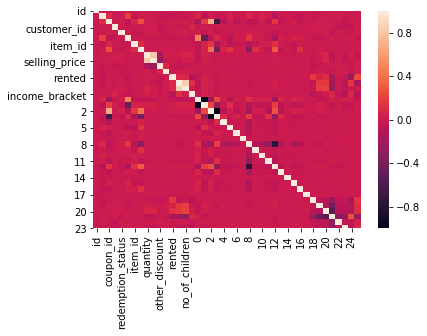

In [92]:
# Heatmap
sns.heatmap(train_final.corr())

### The following 5 pair of variables have a very strong (r > 0.7) between them:
#### 1. quantity & selling_price
#### 2. 0 & 1
#### 3. 2 & 3
#### 4. family_size & no_of_children
#### 5. 24 & 25

### Since the pairs above are good predictors of each other, I am going to drop the following five variables from both training & test sets:
#### 1. quantity
#### 2. 1
#### 3. 3
#### 4. no_of_children
#### 5. 25

In [9]:
# Dropping the variables 
train_final.drop(['quantity', '1', '3', 'no_of_children', '25'], axis=1, inplace=True)
test_final.drop(['quantity', '1', '3', 'no_of_children', '25'], axis=1, inplace=True)

### As i mentioned during EDA, there's a case of class imbalance. To deal with it, i am going to undersampling by taking the same no. of rows corresponding to redemption status

In [19]:
train_final['redemption_status'].value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

###  Since there are 729 observations corresponding to 1, i am going to extract the same no. of observations corresponding to 0

In [66]:
# Storing 729 observations corresponding to redemption_status = 0
t0 = train_final.query('redemption_status == 0').sample(729)

In [67]:
# Storing observations corresponding to redemption_status = 1
t1 = train_final.query('redemption_status == 1')

In [68]:
# Concatenating t0 & t1 horizontally
X = pd.concat([t0, t1], axis=0)

In [69]:
# Checking shape
X.shape

(1458, 37)

In [176]:
test_final.shape

(50226, 36)

### Before starting with predictive models, the last step will be to separate out the redemption_status feature which has to be predicted

In [8]:
y = X.redemption_status

In [9]:
# Dropping the redemption_status column
X.drop('redemption_status', axis=1, inplace= True)

In [11]:
X.shape

(1458, 37)

## 1. RANDOM FOREST

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [92]:
rf = RandomForestClassifier().fit(X,y)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### A. FEATURE SELECTION

##### Using L1 regularization technique, i am going to find features that should be used for prediction 

In [5]:
from sklearn.feature_selection import SelectFromModel

In [93]:
# Creating an instance
rf_fs = SelectFromModel(rf, prefit=True)

In [94]:
# Transforming the training set
x_new = rf_fs.transform(X)

In [95]:
x_new

array([[5.62950e+04, 3.00000e+01, 5.29000e+02, ..., 1.00000e+00,
        5.00000e+00, 1.00000e+00],
       [1.14648e+05, 1.30000e+01, 1.57000e+02, ..., 0.00000e+00,
        3.00000e+00, 0.00000e+00],
       [1.13144e+05, 9.00000e+00, 4.44000e+02, ..., 1.00000e+00,
        4.00000e+00, 1.00000e+00],
       ...,
       [1.27701e+05, 1.30000e+01, 7.26000e+02, ..., 1.00000e+00,
        5.00000e+00, 1.00000e+00],
       [1.28076e+05, 9.00000e+00, 7.05000e+02, ..., 0.00000e+00,
        3.00000e+00, 1.00000e+00],
       [1.28154e+05, 7.00000e+00, 3.92000e+02, ..., 1.00000e+00,
        5.00000e+00, 1.00000e+00]])

#### The above array needs to be inverse transformed in order to identify features that have been selected. Note the columns full of zeroes means that that feature hasn't been selected

In [96]:
# Inverse transforming x_new
selected = pd.DataFrame(rf_fs.inverse_transform(x_new), index=X.index, columns=X.columns)
selected.head()

,id,campaign_id,coupon_id,customer_id,campaign_days,item_id,brand,selling_price,other_discount,coupon_discount,...,15,16,17,18,19,20,21,22,23,24
0,56295.0,30.0,529.0,388.0,46.0,48631.0,278.0,177.74,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114648.0,13.0,157.0,248.0,47.0,40190.0,56.0,17.81,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,113144.0,9.0,444.0,39.0,32.0,55419.0,133.0,124.67,-30.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85554.0,13.0,165.0,982.0,47.0,63279.0,56.0,6.06,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47947.0,8.0,865.0,501.0,48.0,71535.0,1061.0,26.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Selecting columns for which variance not equal to zero
features = selected.columns[selected.var() != 0]

In [98]:
features

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'campaign_days',
       'item_id', 'brand', 'selling_price', 'other_discount', 'family_size',
       'income_bracket', '2'],
      dtype='object')

In [99]:
features.shape

(12,)

#### B. HYPER-PARAMETER TUNING

##### Using RandomSearch, i will determine the ideal value for n_estimators required for the algorithm

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
params = {'n_estimators':[100, 150,200, 250, 300, 350, 400, 500, 750, 1000]}

In [102]:
rf_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params,verbose=2, n_jobs=-1, cv=5)

In [103]:
rf_rs.fit(X[features], y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [104]:
# Checking best value for n_estimator obtained
rf_rs.best_params_

{'n_estimators': 500}

#### C. CROSS-VALIDATION 

In [105]:
rf_cv = cross_val_score(RandomForestClassifier(n_estimators = 500), X[features], y, scoring='accuracy', n_jobs=-1, cv=5)

In [106]:
rf_cv

array([0.35273973, 0.46575342, 0.60273973, 0.57876712, 0.3862069 ])

In [107]:
# Mean cross-validation score
rf_cv.mean()

0.4772413793103448

#### D. PREDICTION

In [108]:
# Updating the earlier created instance
rf = RandomForestClassifier(n_estimators=1000).fit(X[features], y)

In [109]:
# Making predictions on test set using selected features
rf_pred = rf.predict_proba(test_final[features])

In [110]:
rf_pred

array([[0.504, 0.496],
       [0.454, 0.546],
       [0.331, 0.669],
       ...,
       [0.479, 0.521],
       [0.328, 0.672],
       [0.448, 0.552]])

In [111]:
# Predicting probabilities corresponding to id's whether coupon is redeemed (redemption_status = 1)
pd.DataFrame(rf_pred[:,1], columns='redemption_status')

,0
0,0.496
1,0.546
2,0.669
3,0.484
4,0.506
...,...
50221,0.252
50222,0.524
50223,0.521
50224,0.672


##  2. LOGISTIC REGRESSION

#### Before proceeding with the same procedure as i followed for Random Forest, i will standardize the values of both train and test datasets since linear models tend to do better when the features' values are standardized.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss = StandardScaler()

In [70]:
# Creating copies of train and test datasets
x_lr = X.copy()
test_lr = test_final.copy()

In [72]:
# Standardizing the two datasets
scaled_x_lr = pd.DataFrame(ss.fit_transform(x_lr), columns=x_lr.columns)
scaled_test_lr = pd.DataFrame(ss.transform(test_lr), columns=test_lr.columns)

In [76]:
scaled_x_lr.head()

,id,campaign_id,coupon_id,customer_id,campaign_days,item_id,brand,selling_price,other_discount,coupon_discount,...,15,16,17,18,19,20,21,22,23,24
0,-0.230950,2.234556,-0.241958,-0.863043,0.157523,0.606217,-0.627902,-0.207861,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,-0.452724,0.842177,-0.247256,-0.203540,0.327203
1,1.363104,-0.074914,-1.455296,-1.153358,0.334873,0.210080,-0.835928,-0.628082,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,2.208853,-1.187399,-0.247256,-0.203540,-3.056211
2,1.322019,-0.618319,-0.519199,-1.586756,-2.325379,0.924777,-0.763775,-0.347304,-0.373041,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,-0.452724,-1.187399,-0.247256,4.913037,0.327203
3,0.568331,-0.074914,-1.429203,0.368720,0.334873,1.293647,-0.835928,-0.658955,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,-0.452724,0.842177,-0.247256,-0.203540,0.327203
4,-0.458996,-0.754170,0.853960,-0.628718,0.512223,1.681101,0.105813,-0.604697,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,-0.452724,0.842177,-0.247256,-0.203540,0.327203


In [77]:
scaled_test_lr.head()

,id,campaign_id,coupon_id,customer_id,campaign_days,item_id,brand,selling_price,other_discount,coupon_discount,...,15,16,17,18,19,20,21,22,23,24
0,-1.768702,1.147747,0.867007,0.337615,-2.325379,-0.359603,0.118932,-0.582231,0.178525,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,2.208853,-1.187399,-0.247256,-0.20354,0.327203
1,-1.768675,0.876045,-0.698591,1.579747,4.413926,0.100170,-0.834991,-0.441843,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,2.673060,-0.452724,-1.187399,-0.247256,-0.20354,0.327203
2,-1.768648,1.147747,1.232313,-0.610055,-2.325379,-1.596724,0.362567,-0.114269,-0.525595,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,2.673060,-0.452724,-1.187399,-0.247256,-0.20354,0.327203
3,-1.768566,1.555300,1.519339,-0.919032,-2.325379,-1.496200,0.981961,-0.581285,0.648048,0.160487,...,-0.108616,-0.074278,0.0,6.284903,-0.374103,-0.452724,-1.187399,-0.247256,-0.20354,0.327203
4,-1.768511,0.468491,-0.343070,0.014122,-2.325379,-1.484656,-0.692558,-0.469905,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,-0.452724,0.842177,-0.247256,-0.20354,0.327203


#### A. FEATURE SELECTION

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr = LogisticRegression(penalty='l1').fit(scaled_x_lr, y)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
lr_fs = SelectFromModel(lr, prefit=True)

In [118]:
x_new = lr_fs.transform(scaled_x_lr)

In [119]:
x_new

array([[ 2.23455643, -0.24195801, -0.86304306, ..., -0.24725568,
        -0.2035401 ,  0.32720254],
       [-0.07491383, -1.45529604, -1.15335766, ..., -0.24725568,
        -0.2035401 , -3.05621098],
       [-0.61831859, -0.51919922, -1.58675589, ..., -0.24725568,
         4.91303684,  0.32720254],
       ...,
       [-0.07491383,  0.40058929, -0.82364323, ..., -0.24725568,
        -0.2035401 ,  0.32720254],
       [-0.61831859,  0.3320944 ,  0.40397279, ..., -0.24725568,
        -0.2035401 ,  0.32720254],
       [-0.89002097, -0.68880562, -1.53698767, ..., -0.24725568,
        -0.2035401 ,  0.32720254]])

In [120]:
selected = pd.DataFrame(lr_fs.inverse_transform(x_new), index=scaled_x_lr.index, columns=scaled_x_lr.columns)
selected.head()

,id,campaign_id,coupon_id,customer_id,campaign_days,item_id,brand,selling_price,other_discount,coupon_discount,...,15,16,17,18,19,20,21,22,23,24
0,0.0,2.234556,-0.241958,-0.863043,0.157523,0.606217,-0.627902,-0.207861,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,0.0,0.842177,-0.247256,-0.203540,0.327203
1,0.0,-0.074914,-1.455296,-1.153358,0.334873,0.210080,-0.835928,-0.628082,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,0.0,-1.187399,-0.247256,-0.203540,-3.056211
2,0.0,-0.618319,-0.519199,-1.586756,-2.325379,0.924777,-0.763775,-0.347304,-0.373041,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,0.0,-1.187399,-0.247256,4.913037,0.327203
3,0.0,-0.074914,-1.429203,0.368720,0.334873,1.293647,-0.835928,-0.658955,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,0.0,0.842177,-0.247256,-0.203540,0.327203
4,0.0,-0.754170,0.853960,-0.628718,0.512223,1.681101,0.105813,-0.604697,0.648048,0.160487,...,-0.108616,-0.074278,0.0,-0.159111,-0.374103,0.0,0.842177,-0.247256,-0.203540,0.327203


In [121]:
# Selecting columns for which variance not equal to zero
features = selected.columns[selected.var() != 0]

In [122]:
features

Index(['campaign_id', 'coupon_id', 'customer_id', 'campaign_days', 'item_id',
       'brand', 'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'family_size', '0', '2', '4', '5', '6', '8', '9', '10', '12', '13',
       '15', '16', '18', '19', '21', '22', '23', '24'],
      dtype='object')

In [123]:
features.shape

(29,)

#### B. HYPER-PARAMETER TUNING

##### The optimal value of regularization parameter (C) will be determined

In [113]:
params = {'C':[0.0001, 0.001,0.01,0.1,1,10,100,1000]}

In [114]:
lr_rs = RandomizedSearchCV(LogisticRegression(penalty='l1'), param_distributions=params,verbose=2, n_jobs=-1, cv=5)

In [124]:
lr_rs.fit(scaled_x_lr[features], y)

c:\python37\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l1', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, ve

In [125]:
# Checking the optimal value corresponding to C
lr_rs.best_params_

{'C': 1}

#### C. CROSS-VALIDATION

In [126]:
lr_cv = cross_val_score(LogisticRegression(penalty='l1', C = 1), scaled_x_lr[features], y, scoring='accuracy', n_jobs=-1, cv=5)

In [127]:
lr_cv

array([0.7260274 , 0.71575342, 0.64041096, 0.76027397, 0.69655172])

In [128]:
# Mean cross-validation score
lr_cv.mean()

0.7078034955125176

#### D. PREDICTION

In [131]:
lr = LogisticRegression(C=1, penalty='l1').fit(scaled_x_lr[features],y)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
lr_pred = lr.predict_proba(scaled_test_lr[features])

In [134]:
lr_pred

array([[0.23766182, 0.76233818],
       [0.86040109, 0.13959891],
       [0.18642537, 0.81357463],
       ...,
       [0.34414604, 0.65585396],
       [0.16867922, 0.83132078],
       [0.65258764, 0.34741236]])

In [138]:
# Predicting probabilities corresponding to id's whether coupon is redeemed (redemption_status = 1)
pd.DataFrame(lr_pred[:,1])

,0
0,0.762338
1,0.139599
2,0.813575
3,0.189415
4,0.462806
...,...
50221,0.091513
50222,0.665906
50223,0.655854
50224,0.831321


## 3. XGBOOST

In [148]:
from xgboost import XGBClassifier

In [149]:
xgb = XGBClassifier().fit(X,y)

#### A. FEATURE SELECTION

In [150]:
xgb_fs = SelectFromModel(xgb, prefit=True)

In [151]:
x_new = xgb_fs.transform(X)

In [152]:
x_new

array([[ 30., 529., 388., ...,   0.,   0.,   1.],
       [ 13., 157., 248., ...,   0.,   0.,   0.],
       [  9., 444.,  39., ...,   0.,   0.,   0.],
       ...,
       [ 13., 726., 407., ...,   0.,   0.,   1.],
       [  9., 705., 999., ...,   0.,   0.,   0.],
       [  7., 392.,  63., ...,   1.,   0.,   1.]])

In [153]:
# Inverse transforming x_new
selected = pd.DataFrame(xgb_fs.inverse_transform(x_new), index=X.index, columns=X.columns)
selected.head()

,id,campaign_id,coupon_id,customer_id,campaign_days,item_id,brand,selling_price,other_discount,coupon_discount,...,15,16,17,18,19,20,21,22,23,24
0,0.0,30.0,529.0,388.0,0.0,0.0,278.0,177.74,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,13.0,157.0,248.0,0.0,0.0,56.0,17.81,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,444.0,39.0,0.0,0.0,133.0,124.67,-30.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,13.0,165.0,982.0,0.0,0.0,56.0,6.06,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,8.0,865.0,501.0,0.0,0.0,1061.0,26.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [154]:
# Selecting columns for which variance not equal to zero
features = selected.columns[selected.var() != 0]

In [155]:
features

Index(['campaign_id', 'coupon_id', 'customer_id', 'brand', 'selling_price',
       'other_discount', 'coupon_discount', 'rented', 'family_size', '0', '2',
       '8', '12', '18', '21'],
      dtype='object')

In [156]:
features.shape

(15,)

#### B. HYPER-PARAMETER TUNING

In [160]:
params = {'n_estimators': [100,200,300,400,500,750,1000], 'max_depth':[3,4,5], 'learning_rate':[0.01, 0.05, 0.1, 0.5]}

In [161]:
xgboost = RandomizedSearchCV(XGBClassifier(), param_distributions=params,verbose=2, n_jobs=-1, cv=5)

In [162]:
xgboost.fit(X[features], y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [163]:
# Checking the optimal value of the parameters
xgboost.best_params_

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

#### C. CROSS-VALIDATION

In [164]:
xgb_cv = cross_val_score(XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1), X[features], y, 
                         scoring='accuracy', n_jobs=-1, cv=5)

In [165]:
xgb_cv

array([0.78767123, 0.81164384, 0.78424658, 0.79452055, 0.76206897])

In [166]:
# Mean cross-validation scores
xgb_cv.mean()

0.7880302314596127

#### D. PREDICTION

In [168]:
xgb = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1).fit(X[features], y)

In [170]:
xgb_pred = xgb.predict_proba(test_final[features])

In [173]:
xgb_pred

array([[0.23619306, 0.76380694],
       [0.33865225, 0.66134775],
       [0.10230374, 0.89769626],
       ...,
       [0.33240986, 0.66759014],
       [0.03294182, 0.9670582 ],
       [0.46822488, 0.5317751 ]], dtype=float32)

In [175]:
# Predicting probabilities corresponding to id's whether coupon is redeemed (redemption_status = 1)
pd.DataFrame(xgb_pred[:,1])

,0
0,0.763807
1,0.661348
2,0.897696
3,0.029869
4,0.388274
...,...
50221,0.031309
50222,0.754492
50223,0.667590
50224,0.967058


## 4. LIGHTGBM

In [53]:
from lightgbm import LGBMClassifier

In [54]:
lgbm =  LGBMClassifier().fit(X,y)

#### A. FEATURE SELECTION

In [55]:
lgbm_fs = SelectFromModel(lgbm, prefit=True)

In [56]:
x_new = lgbm_fs.transform(X)

In [57]:
x_new

array([[ 5.62950e+04,  5.29000e+02,  3.88000e+02, ...,  2.78000e+02,
         1.77740e+02,  0.00000e+00],
       [ 1.14648e+05,  1.57000e+02,  2.48000e+02, ...,  5.60000e+01,
         1.78100e+01,  0.00000e+00],
       [ 1.13144e+05,  4.44000e+02,  3.90000e+01, ...,  1.33000e+02,
         1.24670e+02, -3.09900e+01],
       ...,
       [ 1.27701e+05,  7.26000e+02,  4.07000e+02, ...,  7.82000e+02,
         7.12000e+00, -3.56000e+00],
       [ 1.28076e+05,  7.05000e+02,  9.99000e+02, ...,  7.14000e+02,
         6.74640e+02, -3.34800e+01],
       [ 1.28154e+05,  3.92000e+02,  6.30000e+01, ...,  5.70000e+01,
         8.01400e+01,  0.00000e+00]])

In [58]:
# Inverse transforming x_new
selected = pd.DataFrame(lgbm_fs.inverse_transform(x_new), index=X.index, columns=X.columns)
selected.head()

,id,campaign_id,coupon_id,customer_id,campaign_days,item_id,brand,selling_price,other_discount,coupon_discount,...,15,16,17,18,19,20,21,22,23,24
0,56295.0,0.0,529.0,388.0,0.0,48631.0,278.0,177.74,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114648.0,0.0,157.0,248.0,0.0,40190.0,56.0,17.81,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,113144.0,0.0,444.0,39.0,0.0,55419.0,133.0,124.67,-30.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85554.0,0.0,165.0,982.0,0.0,63279.0,56.0,6.06,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47947.0,0.0,865.0,501.0,0.0,71535.0,1061.0,26.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Selecting columns for which variance not equal to zero
features = selected.columns[selected.var() != 0]

In [60]:
features

Index(['id', 'coupon_id', 'customer_id', 'item_id', 'brand', 'selling_price',
       'other_discount'],
      dtype='object')

In [61]:
features.shape

(7,)

#### B. HYPER-PARAMETER TUNING

In [62]:
params = {'max_depth':[-1,1,2,3], 'learning_rate':[0.1,0.05,0.01], 'n_estimators':[100,200,300,400,500], 'num_leaves':[20,30,31,35,40,50,100]}

In [66]:
lgbm_rs = RandomizedSearchCV(LGBMClassifier(), param_distributions=params, verbose=2, n_jobs=-1, cv=5, random_state=42)

In [67]:
lgbm_rs.fit(X[features], y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished
c:\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...silent=True,
                                            subsample=1.0,
                                            subsample_f

In [68]:
# Checking the optimal value of the parameters
lgbm_rs.best_params_

{'num_leaves': 20, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.05}

#### C. CROSS-VALIDATION

In [69]:
lgbm_cv = cross_val_score(LGBMClassifier(num_leaves = 20, n_estimators = 100, max_depth = 1, learning_rate = 0.05, objective = 'binary'), X[features], y, scoring='accuracy', n_jobs=-1, cv=5)

In [70]:
lgbm_cv

array([0.25684932, 0.54109589, 0.61986301, 0.60958904, 0.25172414])

In [71]:
# Mean cv score
lgbm_cv.mean()

0.4558242796410014

#### D. PREDICTION

In [73]:
lgbm = LGBMClassifier(num_leaves = 20, n_estimators = 100, max_depth = 1, learning_rate = 0.05, objective = 'binary').fit(X[features],y)

In [74]:
lgbm_pred = lgbm.predict_proba(test_final[features])

In [75]:
lgbm_pred

array([[0.41544304, 0.58455696],
       [0.42843448, 0.57156552],
       [0.41544304, 0.58455696],
       ...,
       [0.48703945, 0.51296055],
       [0.41544304, 0.58455696],
       [0.48703945, 0.51296055]])

In [76]:
# Predicting probabilities corresponding to id's whether coupon is redeemed (redemption_status = 1)
pd.DataFrame(lgbm_pred[:,1])

,0
0,0.584557
1,0.571566
2,0.584557
3,0.512961
4,0.512961
...,...
50221,0.443370
50222,0.562120
50223,0.512961
50224,0.584557
